In [1]:
import pythetatools.toyxp as toyxp
from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.config_samples import inter2_to_label, flavour_to_label

from pythetatools.base_visualisation import show_minor_ticks, plot_stacked_samples
from pythetatools.file_manager import read_histogram, download
from pythetatools.base_analysis import divide_arrays, poisson_error_bars

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot
from matplotlib import gridspec

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.28/04


In [2]:
dir_ver = 'OA2023'
base_dir = f"{inputs_dir}/{dir_ver}/ToyXP"

outdir_path = f'{outputs_dir}/plots/{dir_ver}/ToyXp/'
os.makedirs(outdir_path, exist_ok=True)

In [3]:

def get_labels(sample_per_mode, kind):
    labels = []
    if kind=='inter':
        dict_to_labels = inter2_to_label
    elif kind=='flavour':
        dict_to_labels = flavour_to_label
        
    for sample in sample_per_int_mode.samples:
        mode_name = sample.title[len(sample.sample_title)+1:]
        labels.append(dict_to_labels[mode_name])
    
    return labels


In [4]:
def plot_toyxp_distr_breakdown(ax, sample_per_mode, kind, data_sample=None):
    labels = get_labels(sample_per_mode, kind)
    plot_stacked_samples(ax, sample_per_int_mode.samples, labels=labels)
    if data_sample:
        data_sample.plot(ax, wtag=True, kind='data')
    show_minor_ticks(ax)
    ax.legend(loc='best')

# Loading Asimov and Data files

In [5]:
sample_titles = ['numu1R', 'nue1R', 'numubar1R', 'nuebar1R', 'nue1RD', 'numucc1pi']

local_path_to_asimov_postbanff = f"{base_dir}/ToyXP_AsimovA22_OA2023_hist_by_interaction_postBanff.root"
local_path_to_asimov_prebanff = f"{base_dir}/ToyXP_AsimovA22_OA2023_hist_by_interaction_preBanff.root"
local_path_to_data = f"{base_dir}/Datafile_run11.root"
local_path_to_asimovbf = f"{base_dir}/ToyXP_AsimovBestFit_OA2023_postBanff_systpostSK.root"

local_path_to_asimov_dict = {'postBanff':local_path_to_asimov_postbanff, 'preBanff':local_path_to_asimov_prebanff}

samples_dict = toyxp.get_samples_info(local_path_to_asimov_postbanff, sample_titles=sample_titles)



# Plot events distribution broke down by int. mode

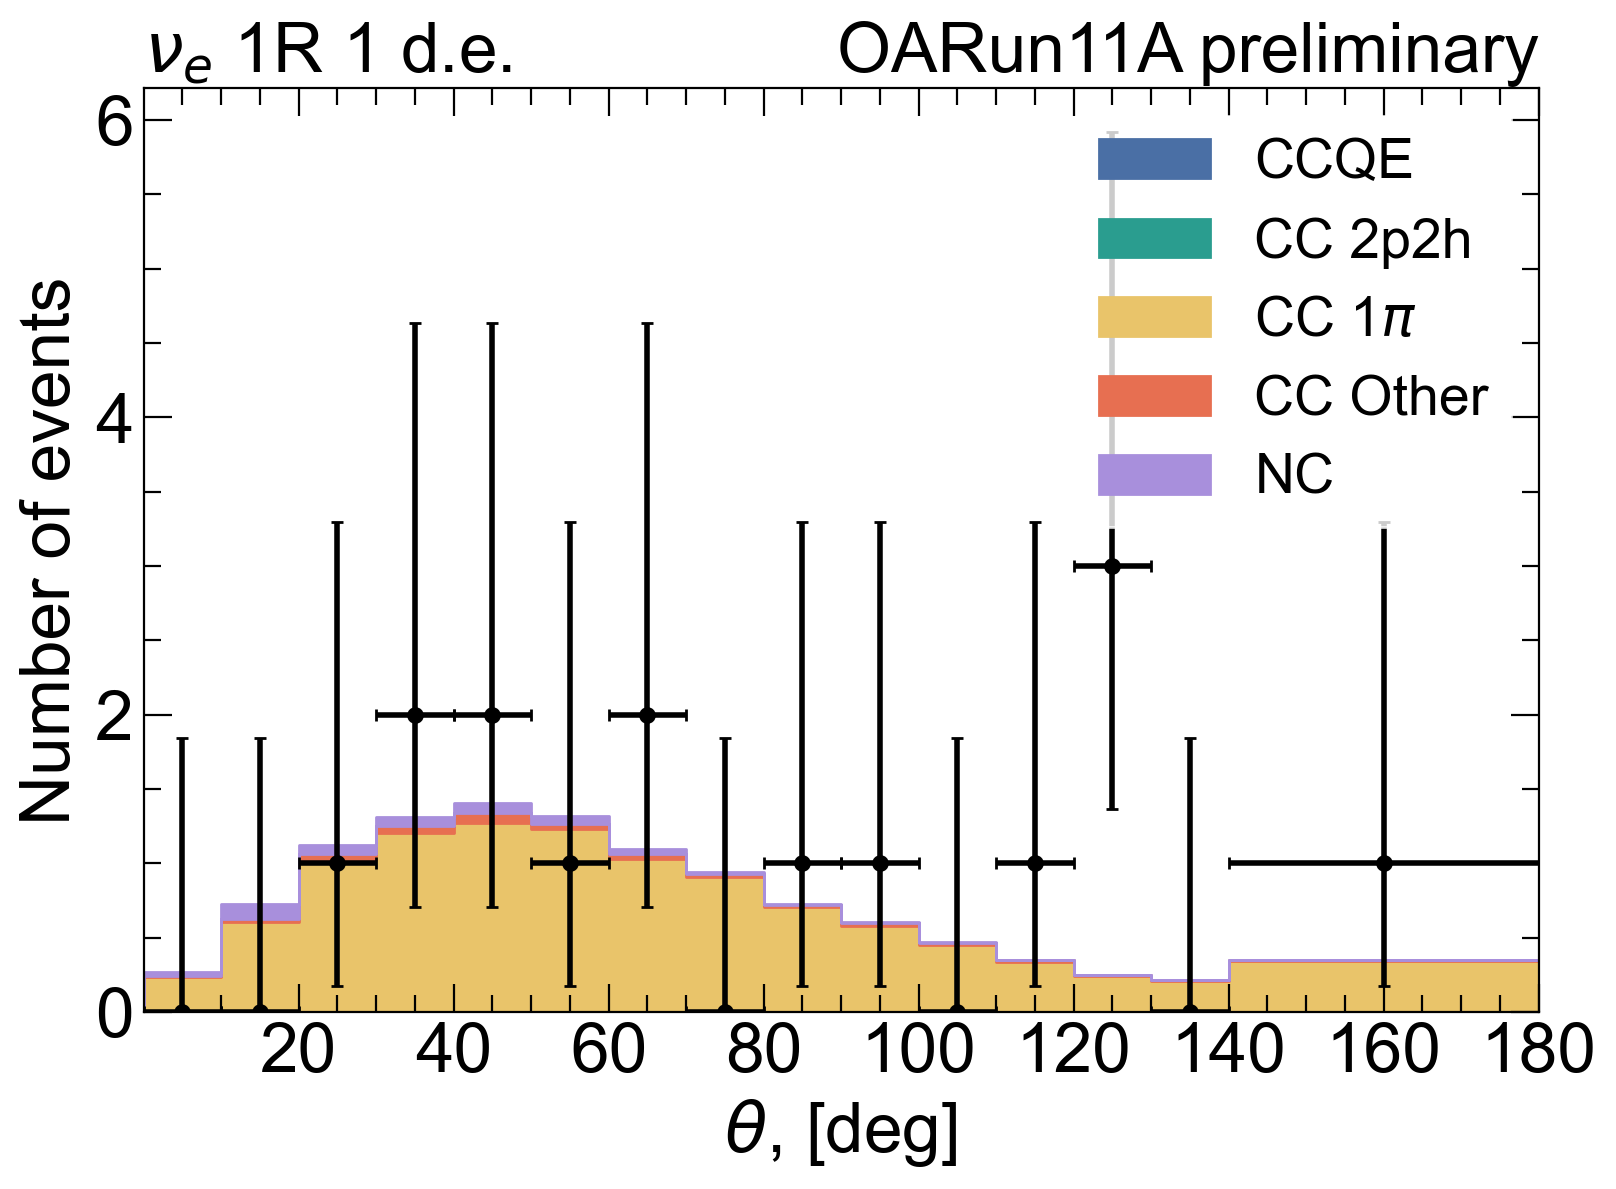

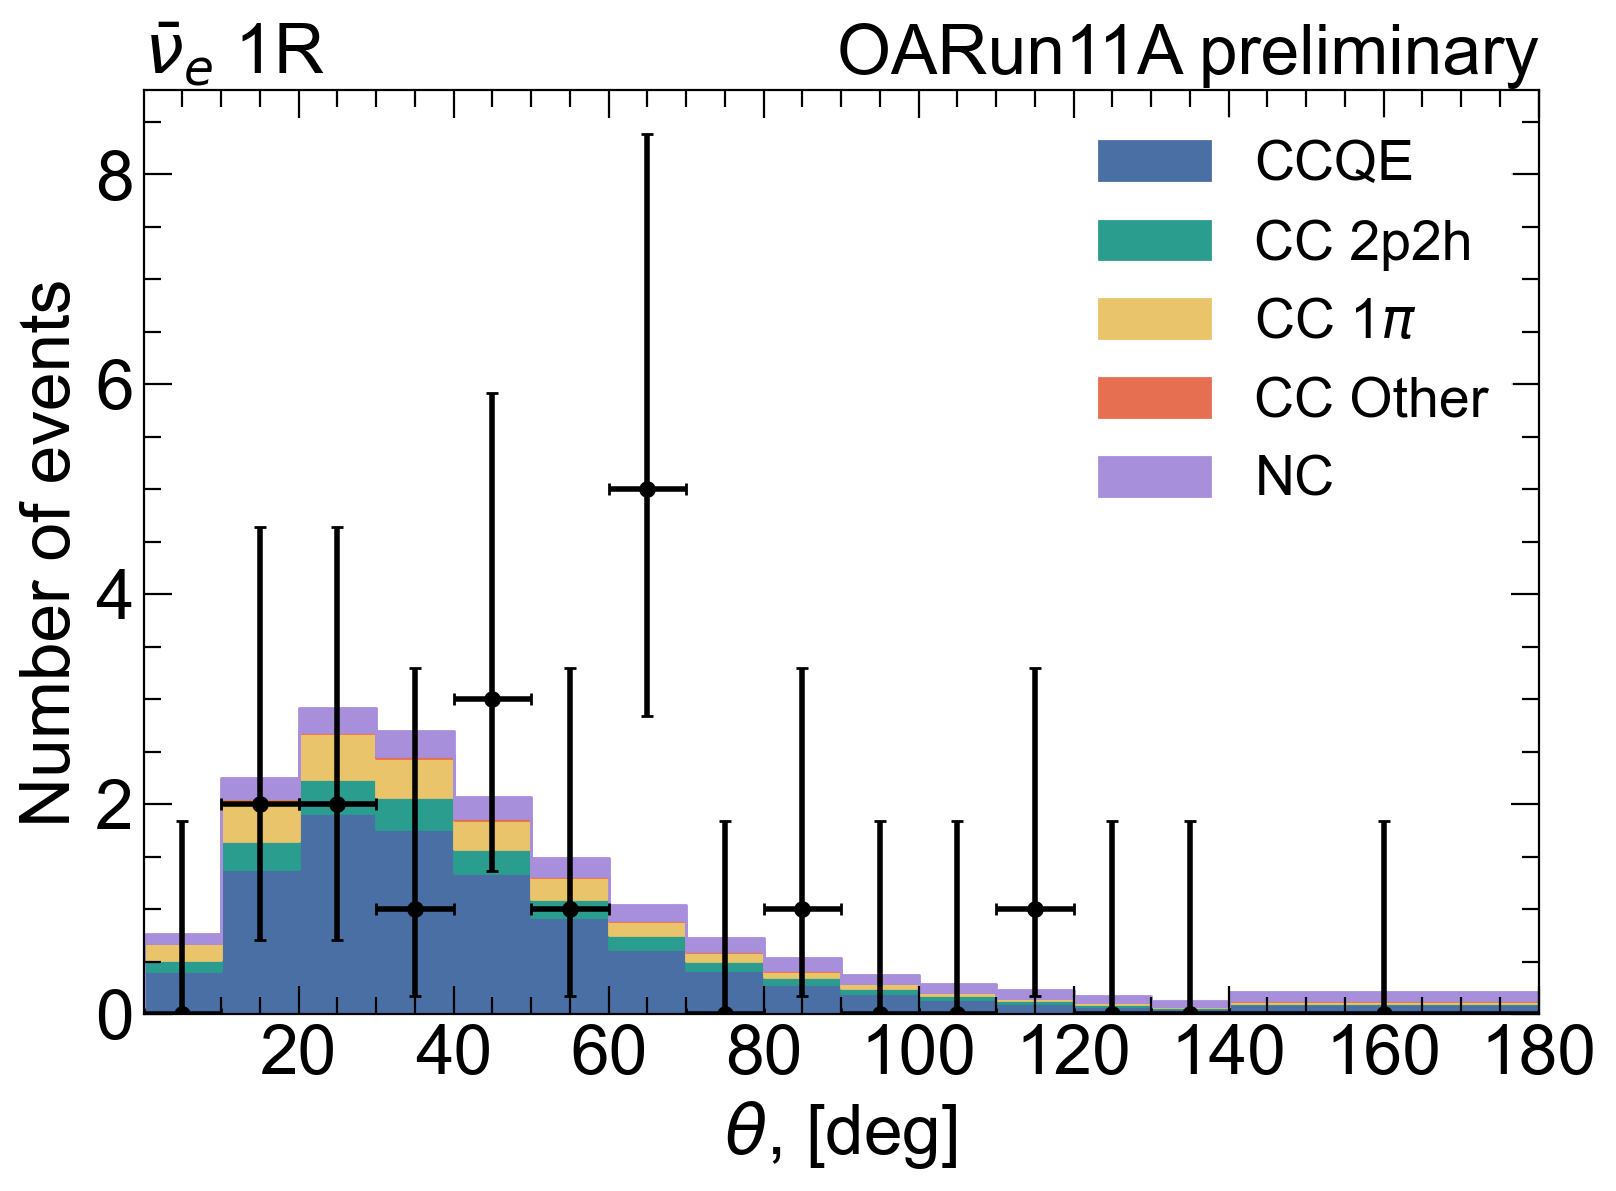

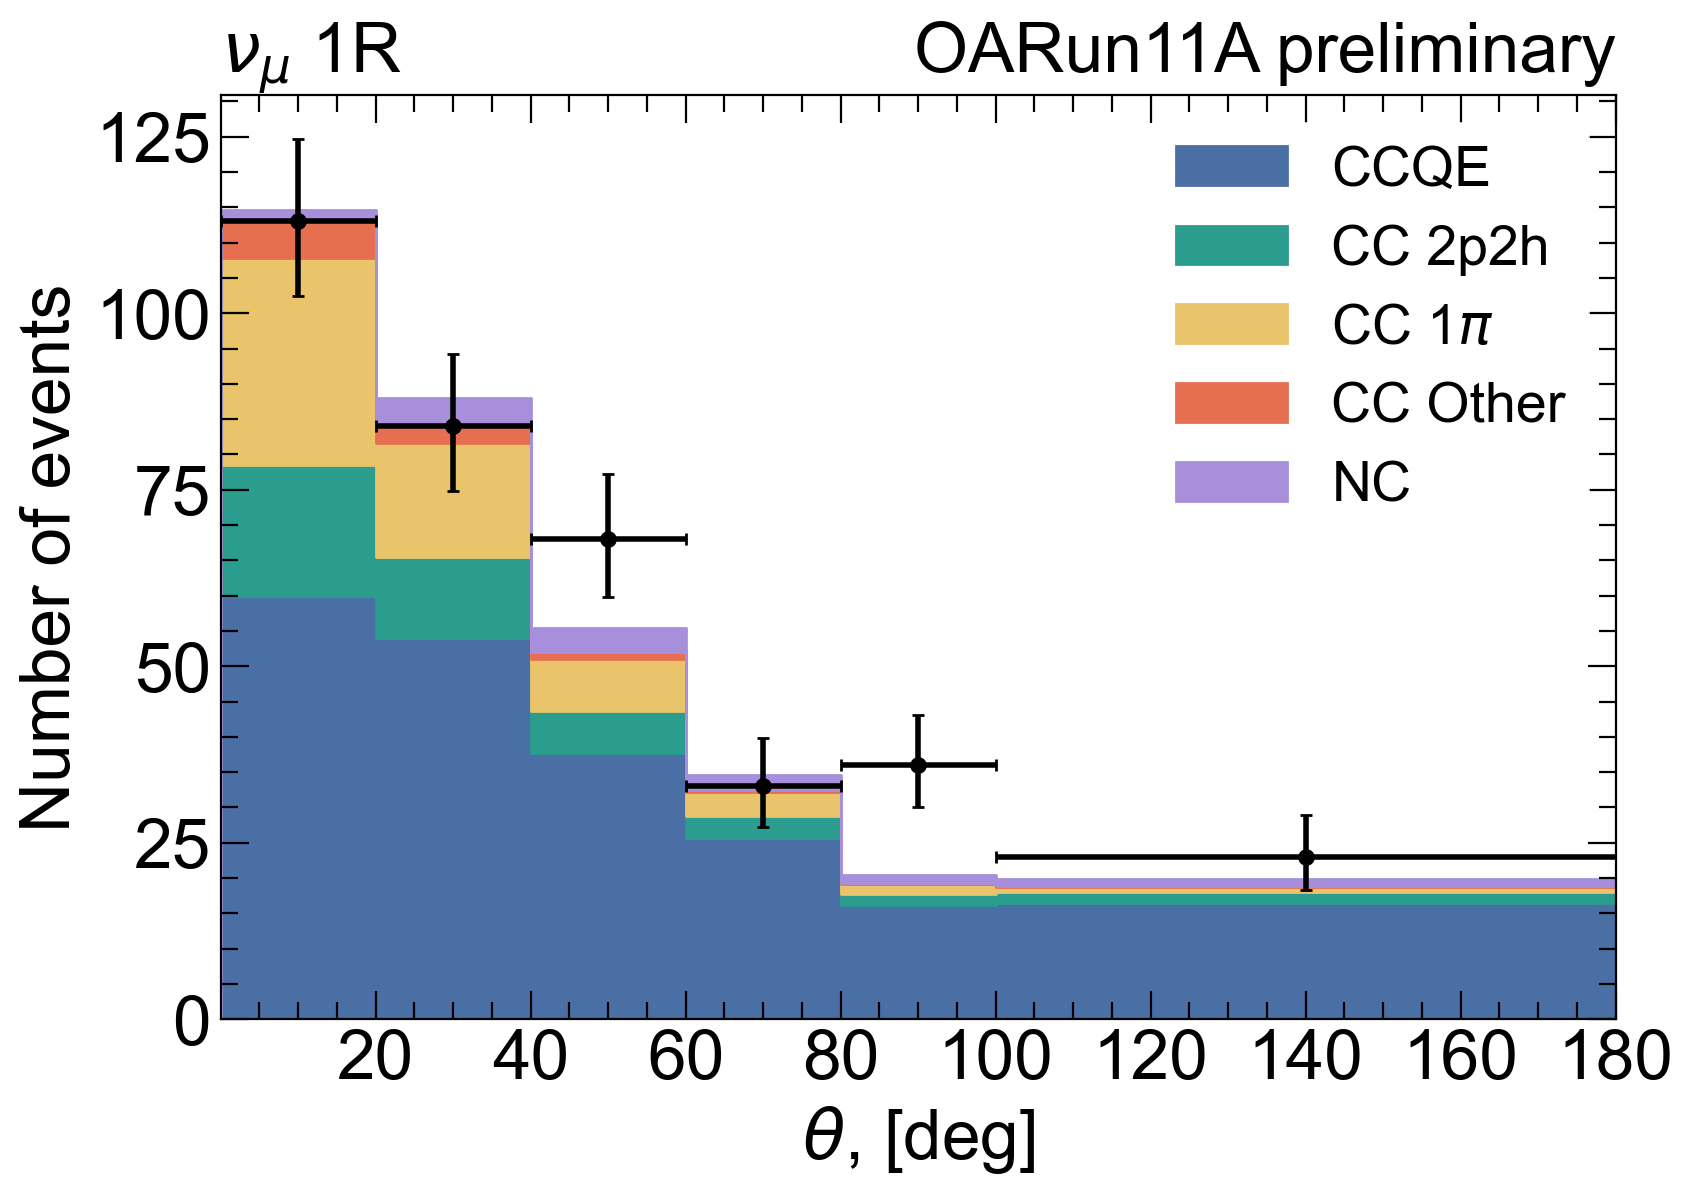

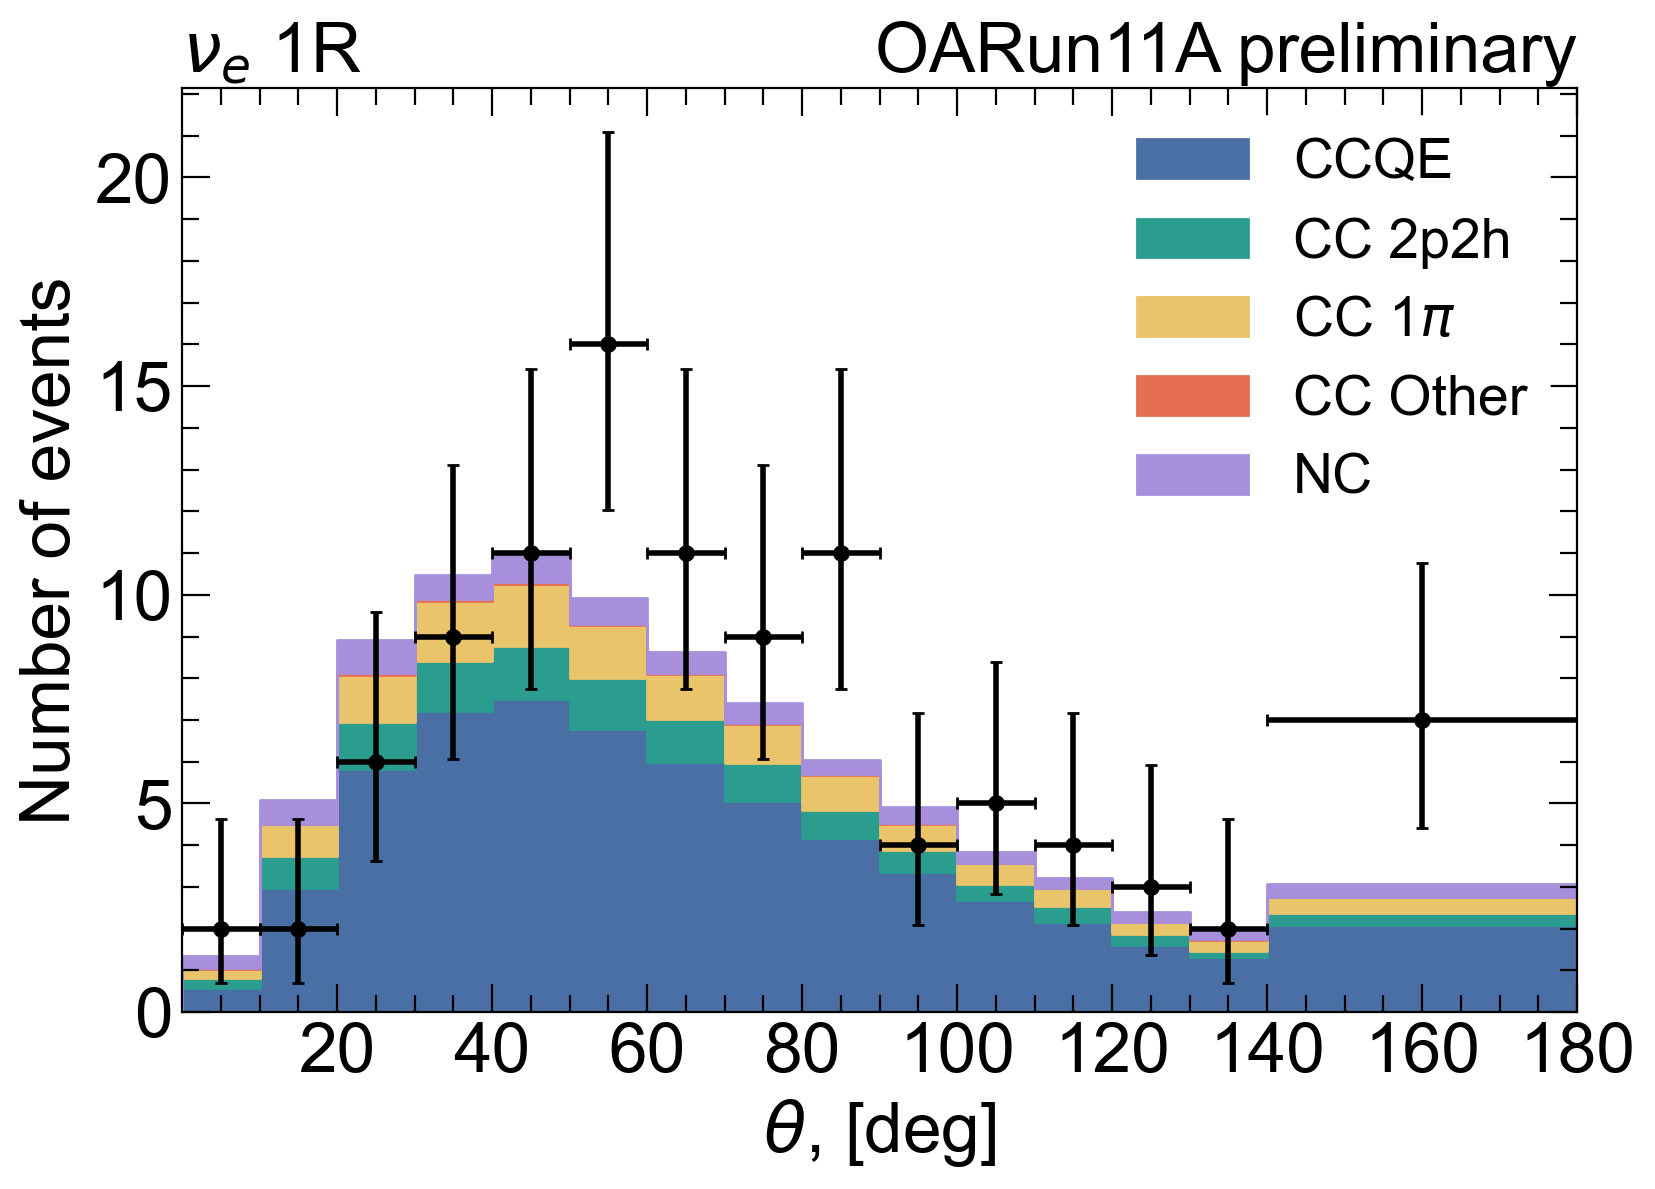

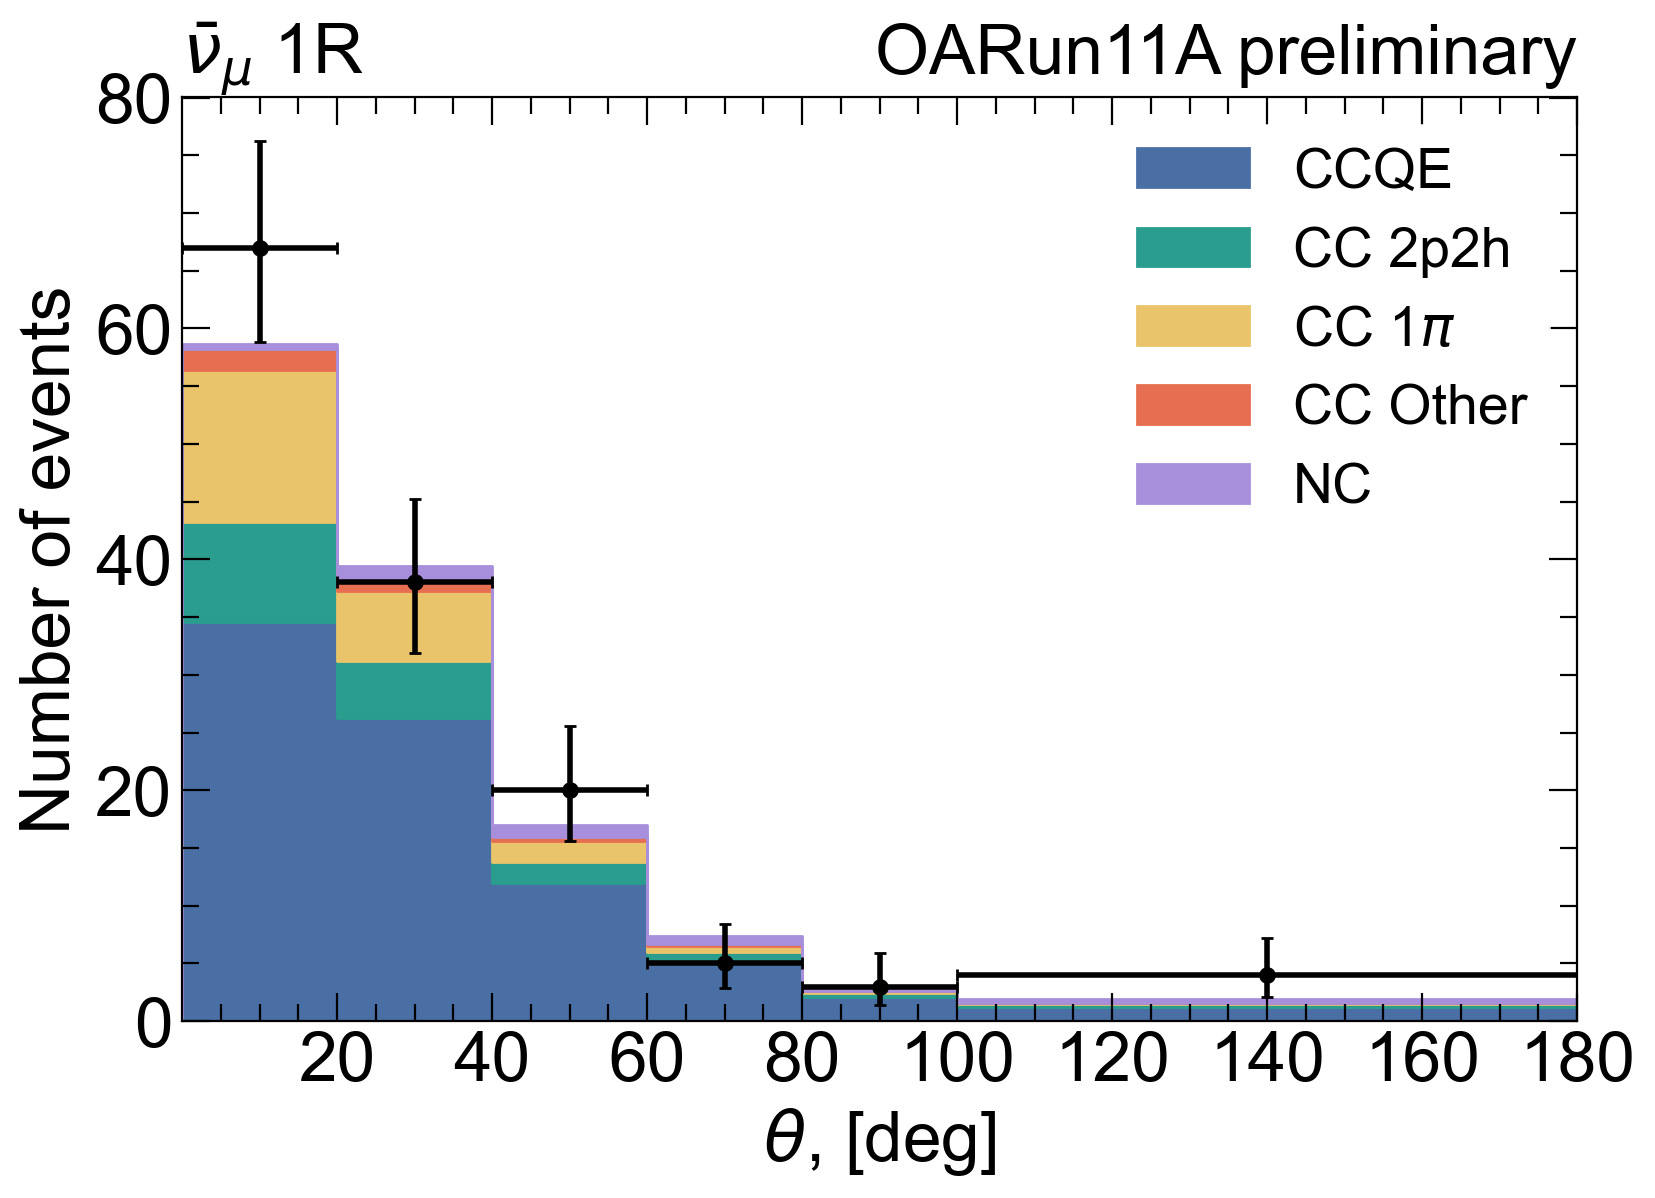

In [6]:
tuning = 'preBanff'
axis='angle'
asimov = 'AsimovA22'


asimov_dataset = toyxp.load(local_path_to_asimov_dict[tuning], kind="asimov", samples_dict=samples_dict, breakdown=True)
data = toyxp.load(local_path_to_data, kind="data",  samples_dict=samples_dict)


asimov_1D = toyxp.project_all_samples(asimov_dataset, axis)
toy_per_int_mode = toyxp.merge_for_inter_plotting(asimov_1D)
data_1D = toyxp.project_all_samples(data, axis)


for sample_title in asimov_1D.sample_titles:
    sample_per_int_mode = toy_per_int_mode.filter_by_sample_title(sample_title)
    
    fig, ax = plt.subplots()
    plot_toyxp_distr_breakdown(ax, sample_per_int_mode, 'inter', data_1D[sample_title])
    fig.savefig(f'{outputs_dir}/plots/{dir_ver}/ToyXp/{sample_title}_{asimov}_axis{axis}_per_int_modes_{tuning}.pdf', bbox_inches='tight')
    

# Plot events distribution broke down by oscillation channel

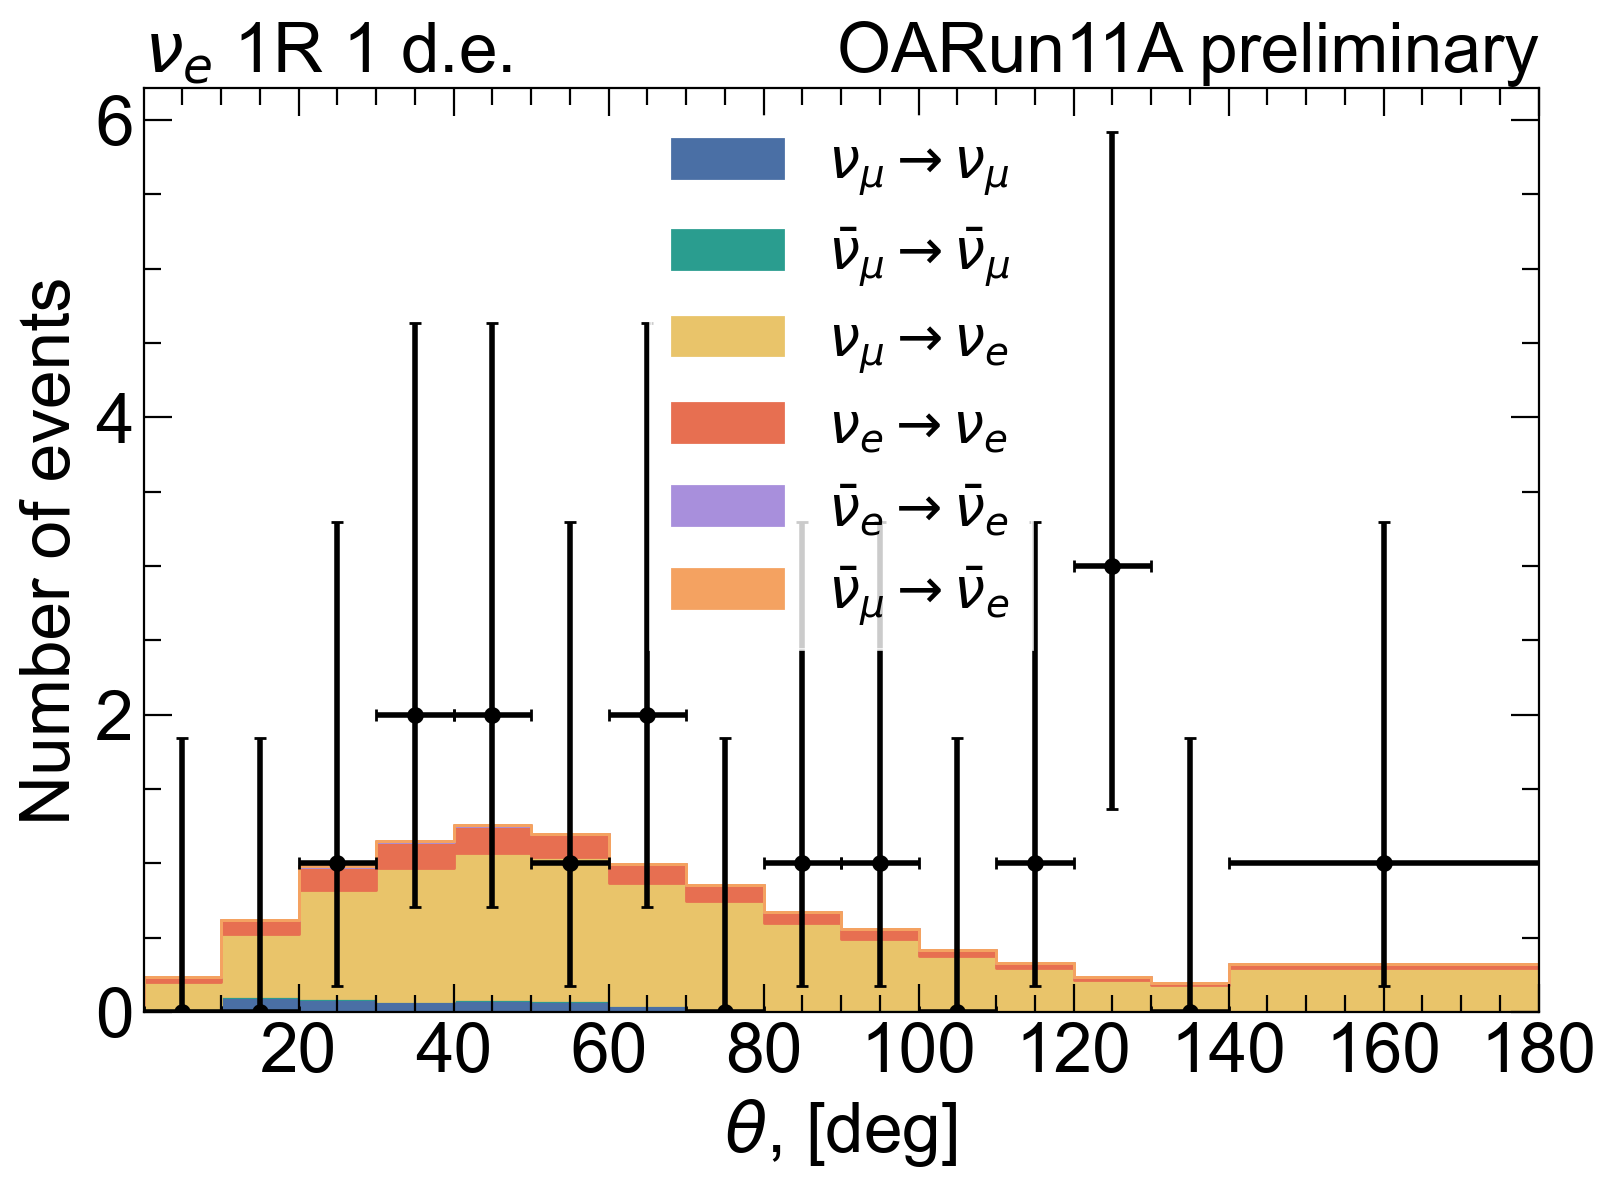

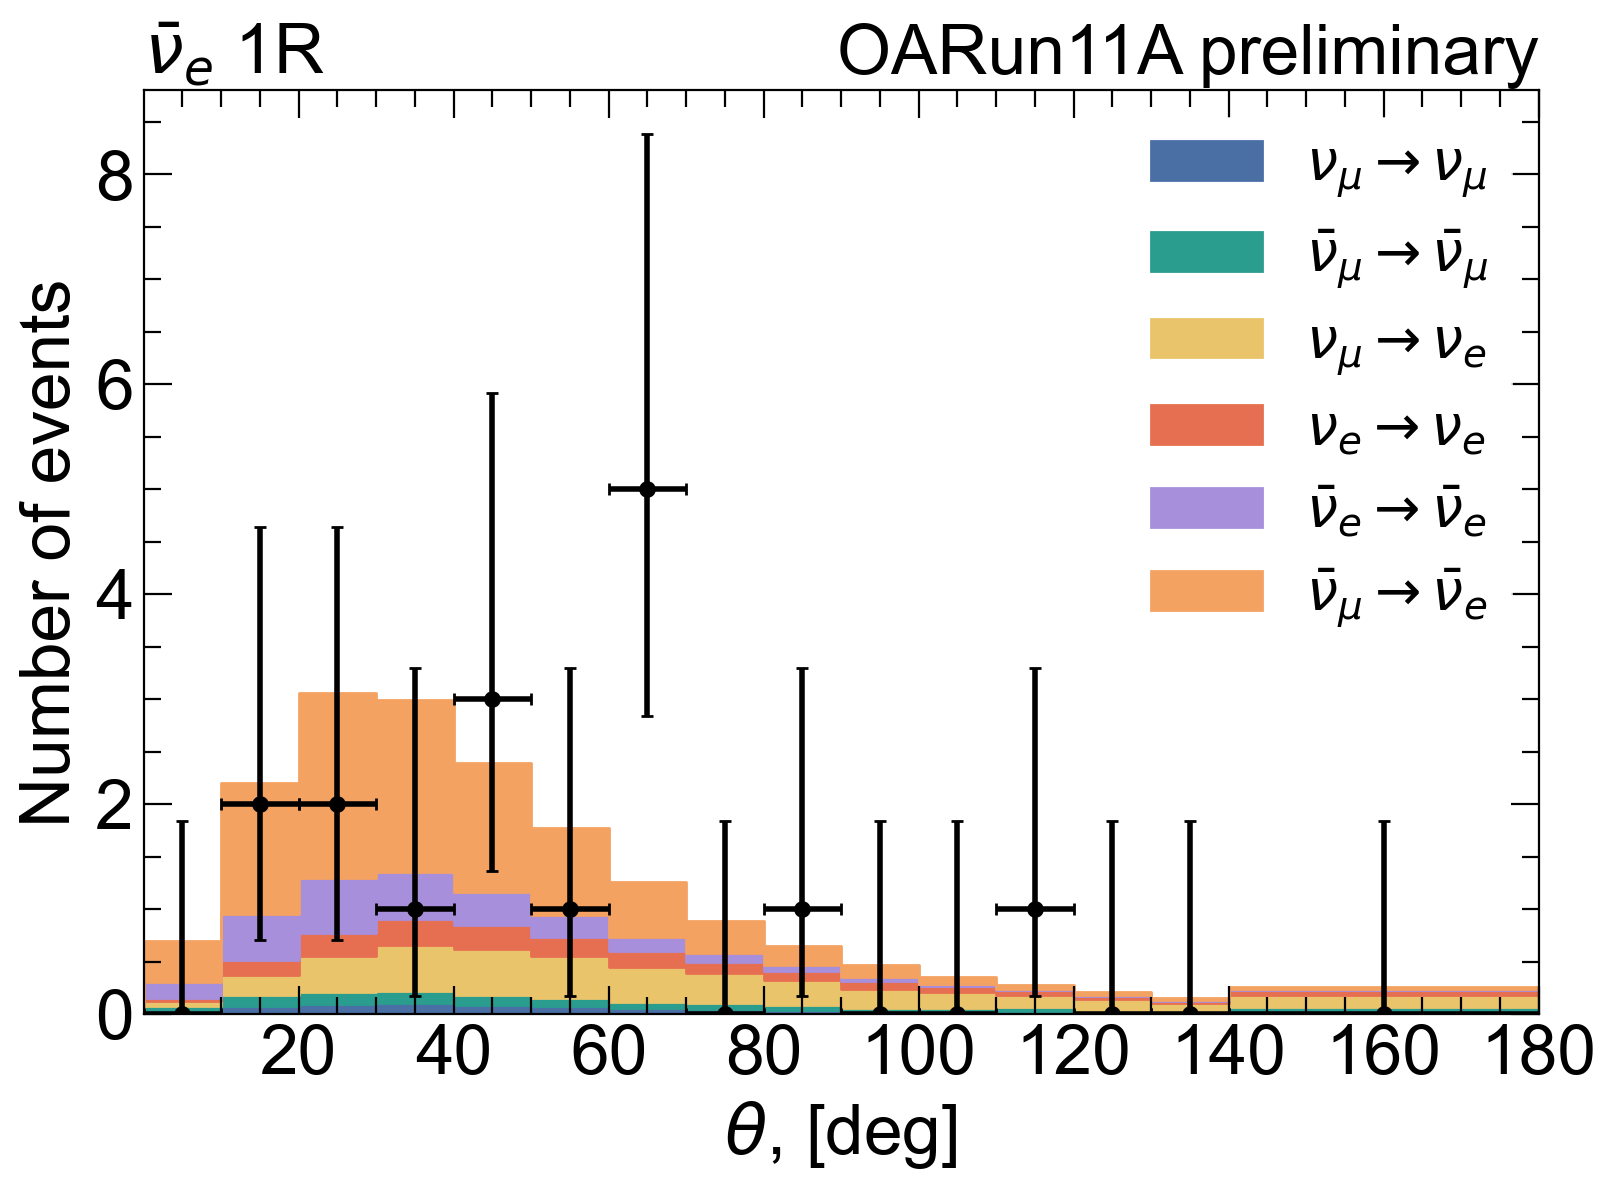

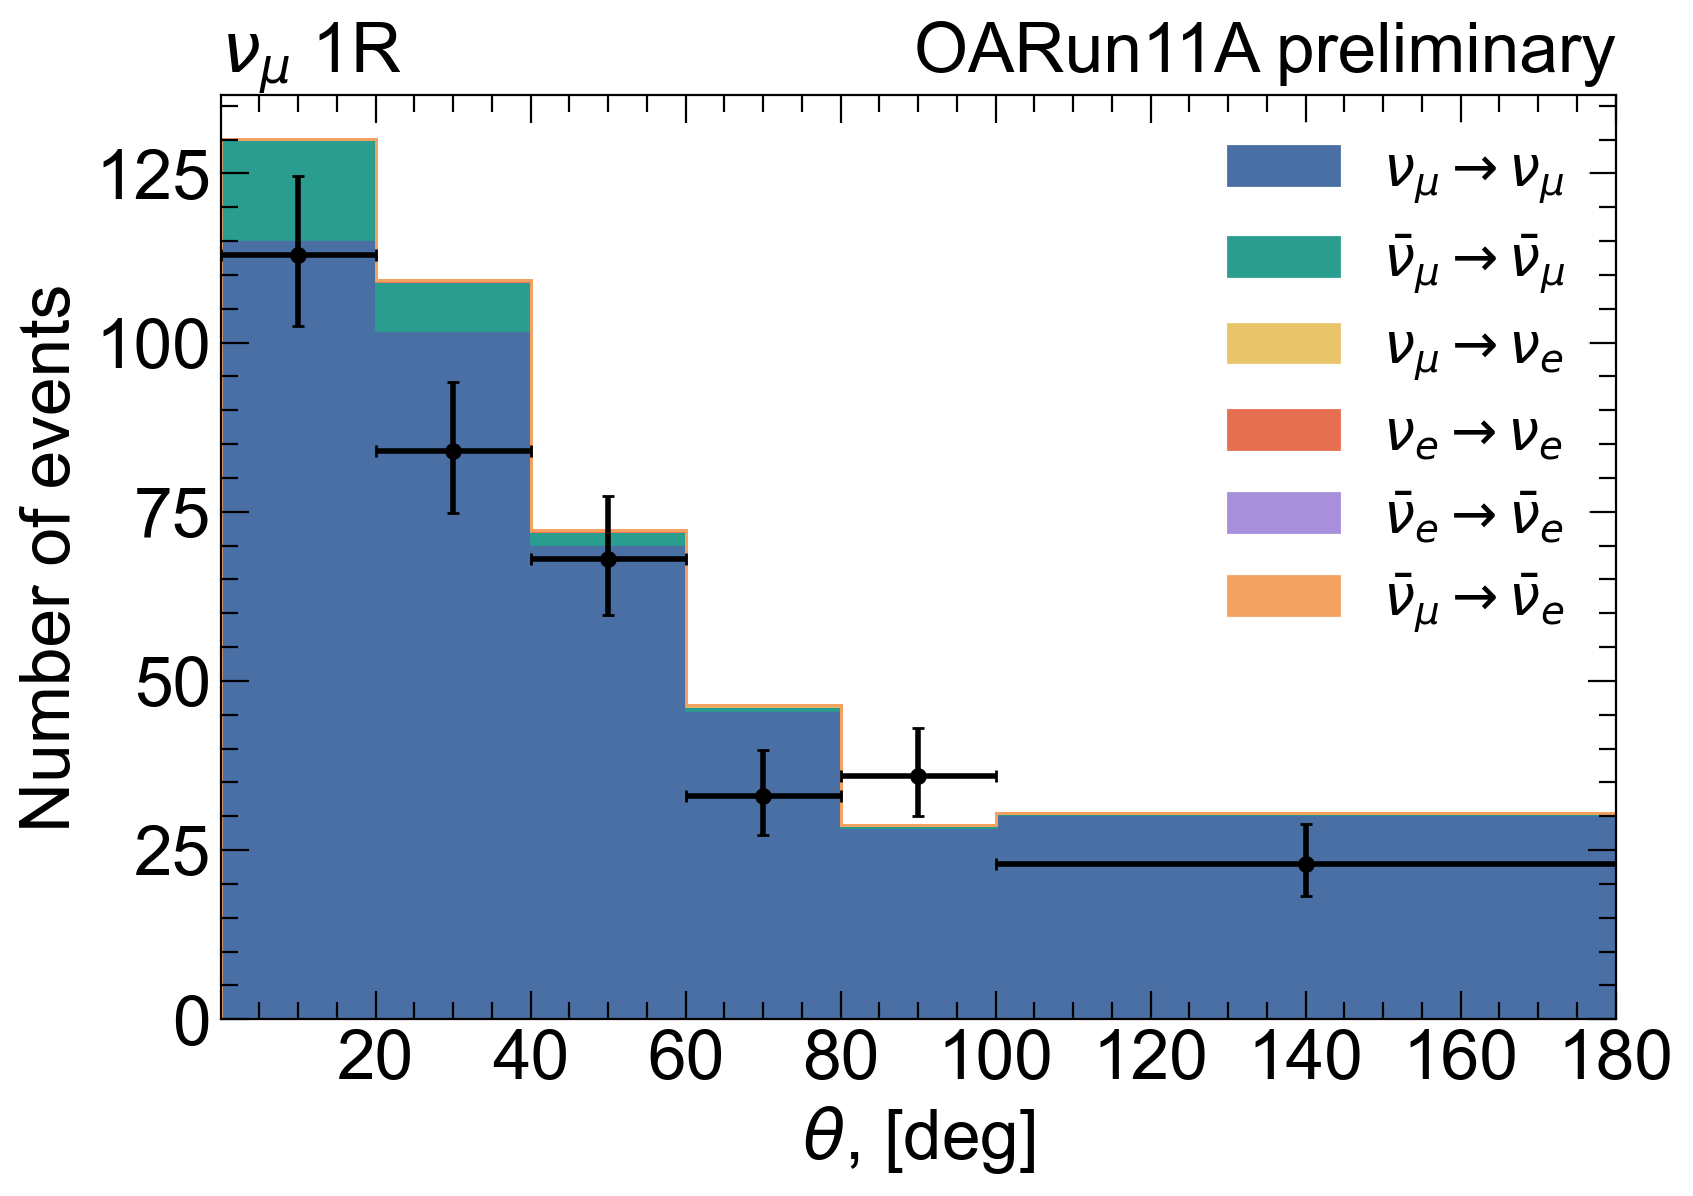

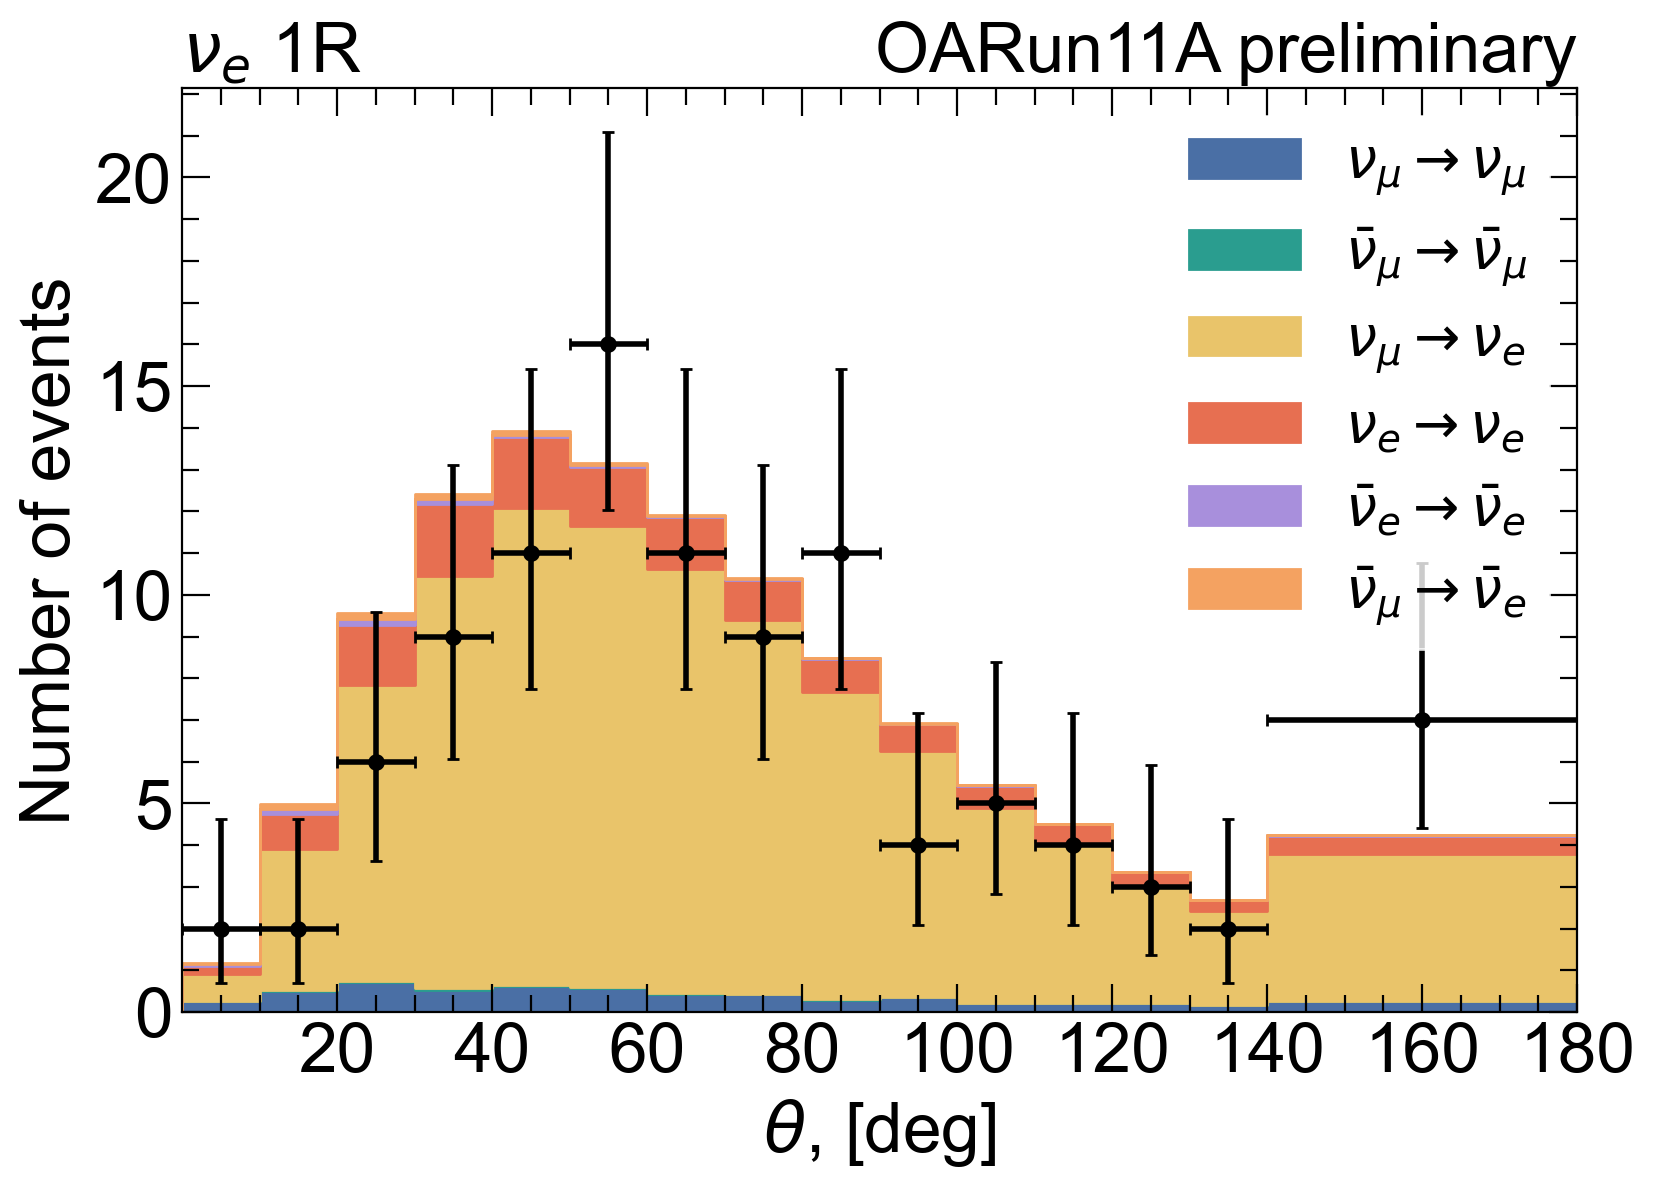

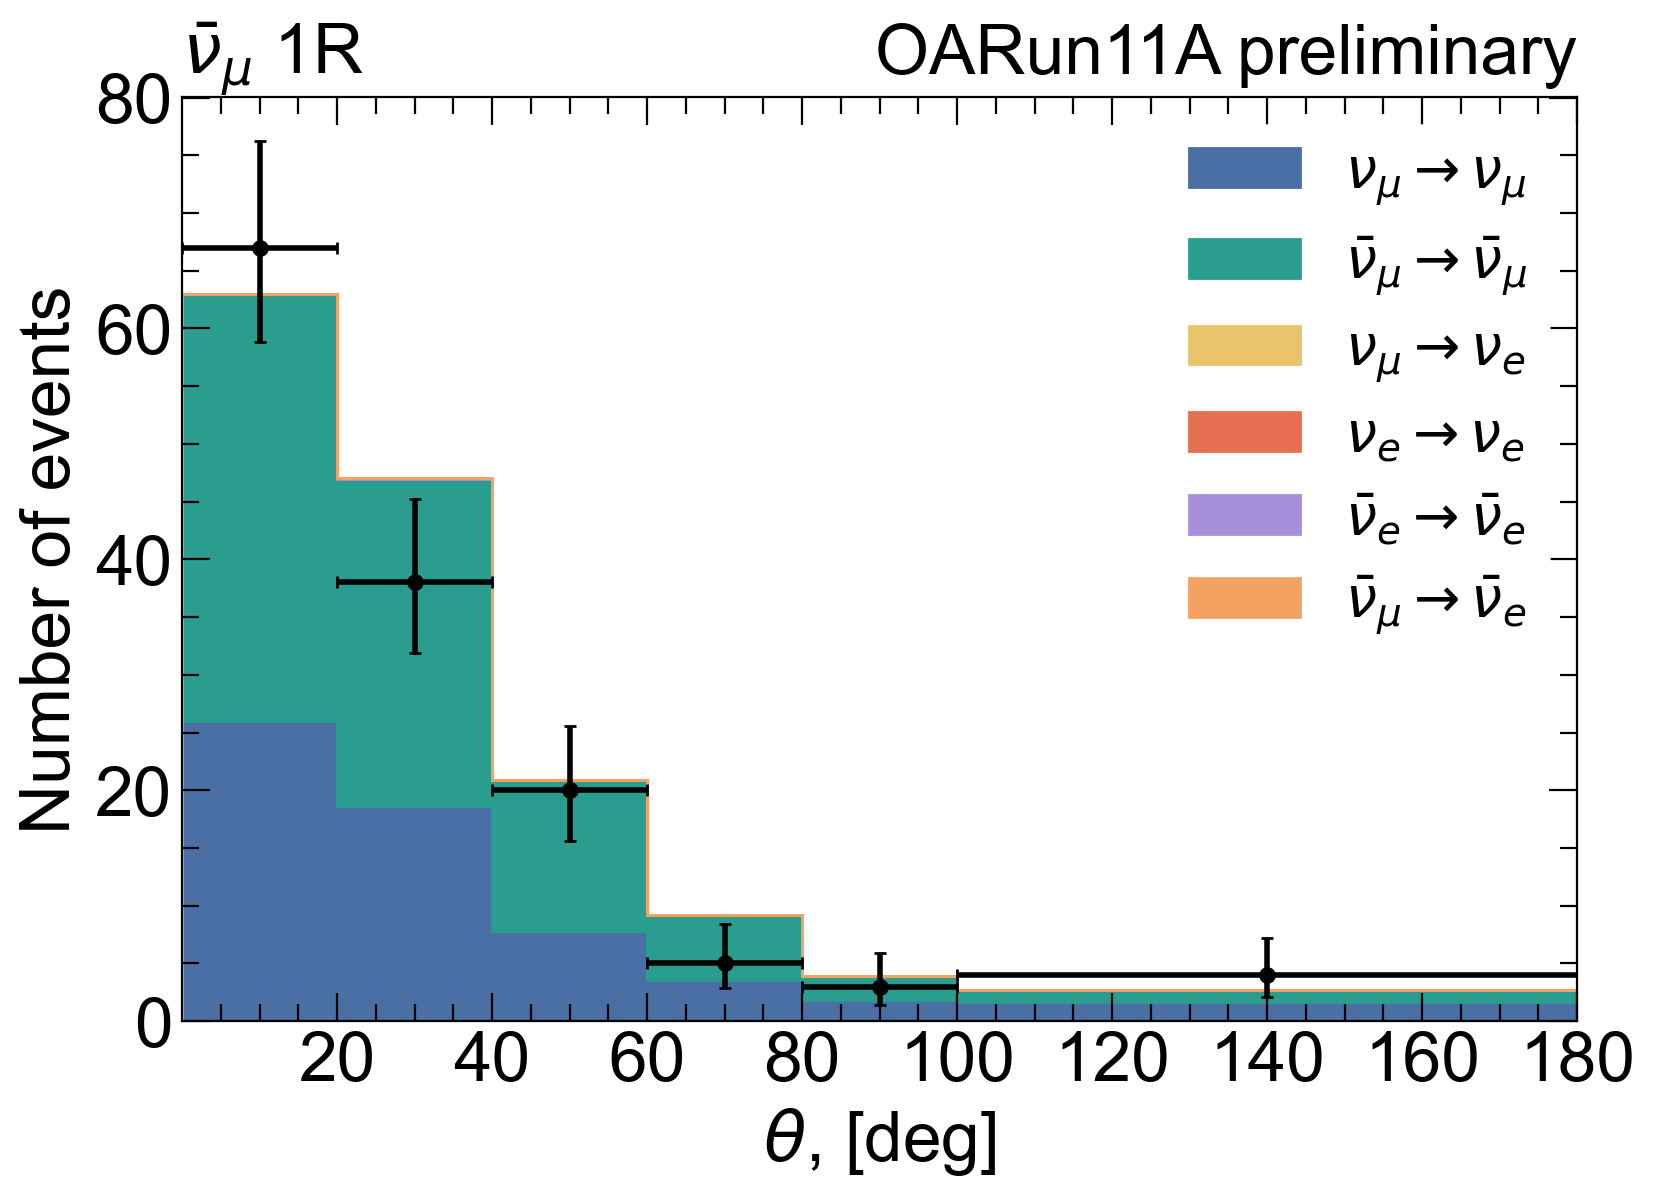

In [7]:

tuning = 'postBanff'
axis='angle'
asimov = 'AsimovA22'

asimov_dataset = toyxp.load(local_path_to_asimov_dict[tuning], kind="asimov", samples_dict=samples_dict,  breakdown=True)
asimov_1D = toyxp.project_all_samples(asimov_dataset, axis)
data = toyxp.load(local_path_to_data, kind="data",  samples_dict=samples_dict)
toy_per_int_mode = toyxp.merge_for_flavour_plotting(asimov_1D)
data_1D = toyxp.project_all_samples(data, axis)



for sample_title in asimov_1D.sample_titles:
    sample_per_int_mode = toy_per_int_mode.filter_by_sample_title(sample_title)
    
    fig, ax = plt.subplots()
    plot_toyxp_distr_breakdown(ax, sample_per_int_mode, 'flavour', data_1D[sample_title])
    fig.savefig(f'{outputs_dir}/plots/OA2023/ToyXp/{sample_title}_{asimov}_axis{axis}_per_flavour_modes_{tuning}.pdf', bbox_inches='tight')
    